In [3]:
#Normal imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Gradient Color Bar Plots
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import colors as mcolors, path

def gradientbars(bars,ydata,cmap):
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    ax.axis(lim)
    for bar in bars:
        bar.set_facecolor("none")
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        grad = np.atleast_2d(np.linspace(0,1*h/max(ydata),256)).T
        ax.imshow(grad, extent=[x,x+w,y,y+h], origin='lower', aspect="auto", 
                  norm=cm.colors.NoNorm(vmin=0,vmax=1), cmap=plt.get_cmap(cmap))



# CPU Methods - Small Data

In [6]:
df = pd.DataFrame({'Method':['Python loop (CPU)','Pandas (CPU)','Numpy (CPU)'], 'Time (ms)':[424,511,2.16]})
df

,Method,Time (ms)
0,Python loop (CPU),424.00
1,Pandas (CPU),511.00
2,Numpy (CPU),2.16


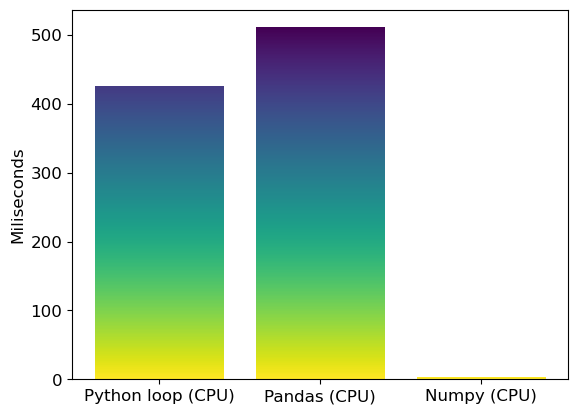

In [9]:
fig, ax = plt.subplots()
my_bar = ax.bar(df['Method'],df['Time (ms)'])
gradientbars(my_bar, df['Time (ms)'], 'viridis_r')

plt.ylabel("Miliseconds")

plt.rcParams.update({'font.size': 12})

plt.savefig("barplot-small-data.png")
plt.show()

# CPU vs GPU Methods - Big Data

In [10]:
df = pd.DataFrame({'Method':['Numpy (CPU)', 'CuPy (GPU)', 'Pytorch (GPU)'], 'Time (ms)':[406,75,105]})
df

,Method,Time (ms)
0,Numpy (CPU),406
1,CuPy (GPU),75
2,Pytorch (GPU),105


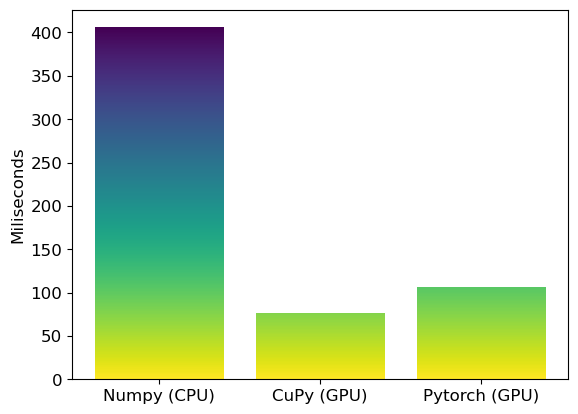

In [11]:
fig, ax = plt.subplots()
my_bar = ax.bar(df['Method'],df['Time (ms)'])
gradientbars(my_bar, df['Time (ms)'], 'viridis_r')

plt.ylabel("Miliseconds")

plt.rcParams.update({'font.size': 12})

plt.savefig("barplot-big-data.png")
plt.show()